### 500 HZ 100mVpp nao funciona

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [173]:
input_csv = "vidro-500Hz-100mBias3.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,632,241,1,4352
1,633,241,1,4352
2,628,242,1,4352
3,631,242,1,4352
4,633,242,1,4352


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 1644
            x    y  p        t
31737999  629  547  1  1100110
31738000  630  547  1  1100110
31738001  631  547  1  1100110
31738002  632  547  1  1100110
31738003  628  545  1  1100110
...       ...  ... ..      ...
31739638  628  391  1  1100160
31739639  629  391  1  1100160
31739640  630  391  1  1100160
31739641  631  391  1  1100160
31739642  633  391  1  1100160

[1644 rows x 4 columns]
Time range: 1100110 to 1100160
Filtered data:
     x    y  p        t
0  629  547  1  1100110
1  630  547  1  1100110
2  631  547  1  1100110
3  632  547  1  1100110
4  628  545  1  1100110
Number of events: 1644
Density array shape: (195608,)
Density indices shape: (1644,)
Max density index: 153664
Min density index: 319
Densities size: 195608
Density indices (first 10): [152096 152096 152096 152096 151312 151312 151312 150920 150920 153664]


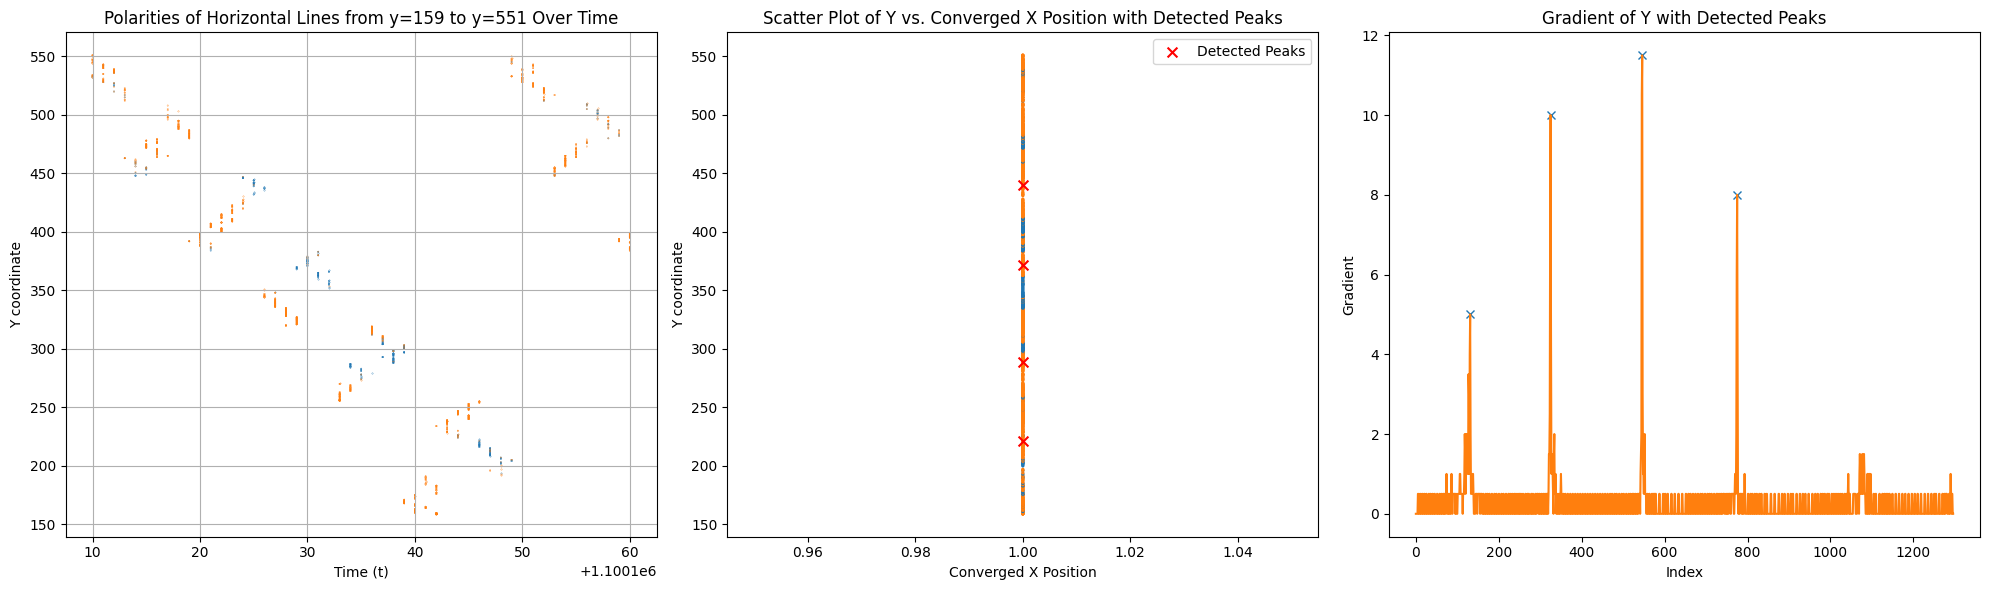

[221 289 372 440]


In [198]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1100110
tmax = 1100160
ymin = 159
ymax = 551
xmin = 628
xmax = 633
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=30, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [199]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592])

[0.         0.09239978 0.18479957 0.27719935 0.36959914 0.46199892
 0.5543987  0.64679849 0.73919827 0.83159806 0.92399784 1.01639762
 1.10879741 1.20119719 1.29359698 1.38599676 1.47839654 1.57079633
 1.66319611 1.75559589 1.84799568 1.94039546 2.03279525 2.12519503
 2.21759481 2.3099946  2.40239438 2.49479417 2.58719395 2.67959373
 2.77199352 2.8643933  2.95679309 3.04919287 3.14159265 3.23399244
 3.32639222 3.41879201 3.51119179 3.60359157 3.69599136 3.78839114
 3.88079093 3.97319071 4.06559049 4.15799028 4.25039006 4.34278984
 4.43518963 4.52758941 4.6199892  4.71238898 4.80478876 4.89718855
 4.98958833 5.08198812 5.1743879  5.26678768 5.35918747 5.45158725
 5.54398704 5.63638682 5.7287866  5.82118639 5.91358617 6.00598596
 6.09838574 6.19078552 0.         0.07570103 0.15140206 0.22710308
 0.30280411 0.37850514 0.45420617 0.52990719 0.60560822 0.68130925
 0.75701028 0.83271131 0.90841233 0.98411336 1.05981439 1.13551542
 1.21121644 1.28691747 1.3626185  1.43831953 1.51402056 1.5897

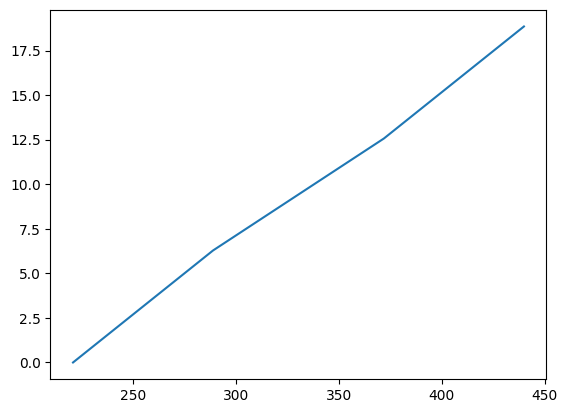

In [200]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [201]:
%matplotlib inline
# Define the parameters
tmin = 100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 31584049
            x    y  p        t
2770047   628  270  0   100000
2770048   632  270  0   100000
2770049   628  271  0   100000
2770050   632  271  0   100000
2770051   633  271  0   100000
...       ...  ... ..      ...
57786176  631  222  1  2000000
57786177  632  222  1  2000000
57786180  628  221  1  2000000
57786181  629  221  1  2000000
57786182  632  221  1  2000000

[31584049 rows x 4 columns]
Time range: 100000 to 2000000


### phase per pixel method application

yp: [43 43 50 ...  2  1  0]
phase: [3.97319071 3.97319071 4.6199892  ... 0.18479957 0.09239978 0.        ]
28979463
28979463


(0.0, 5000.0)

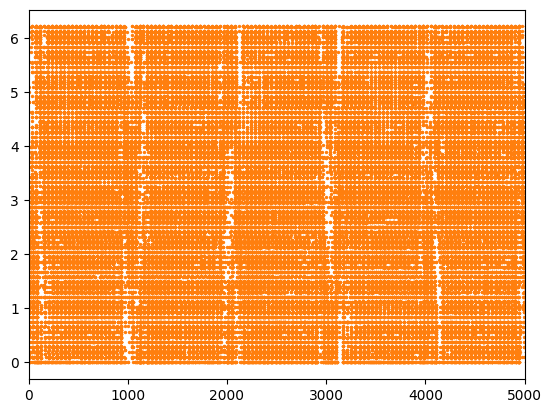

In [202]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,5000)

### Calculation of phase (centroids)

In [203]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [204]:
centroid_y,tval_vec

(array([-2.09785605, -1.985245  ,  2.00073679, ...,  2.70649204,
         0.55645506, -0.16651654]),
 array([   0,    1,    2, ..., 8673, 8674, 8675], dtype=int64))

### phases of events over time

(0.0, 2000.0)

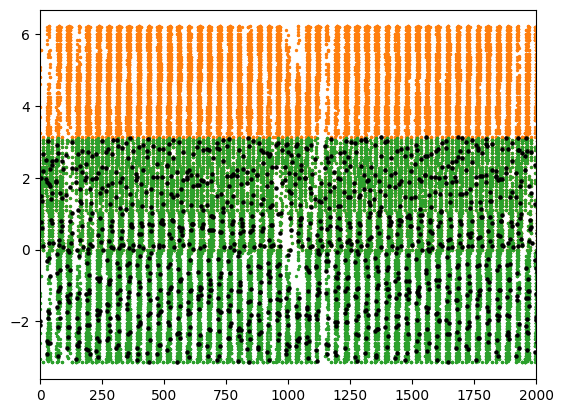

In [205]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

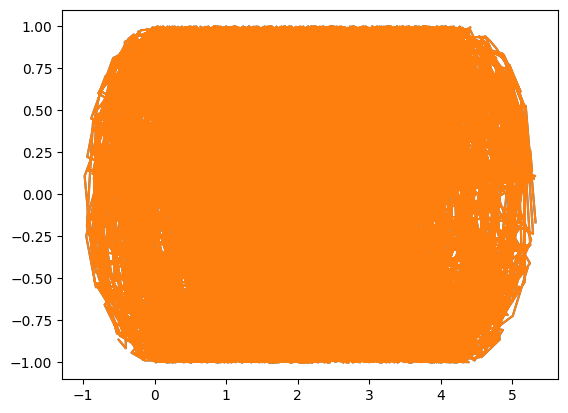

In [206]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

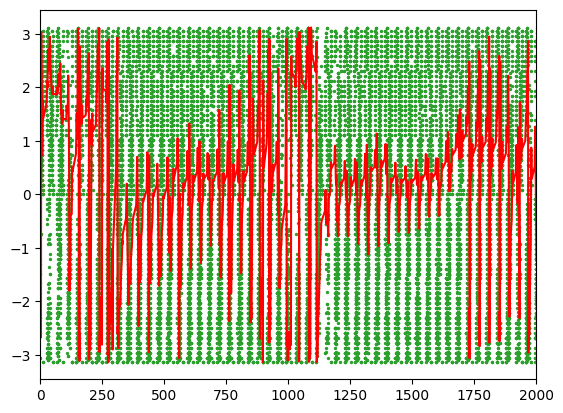

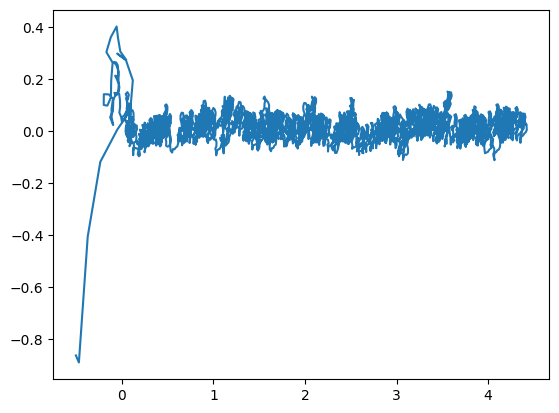

In [207]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.3+0.3j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


12.447837327834435

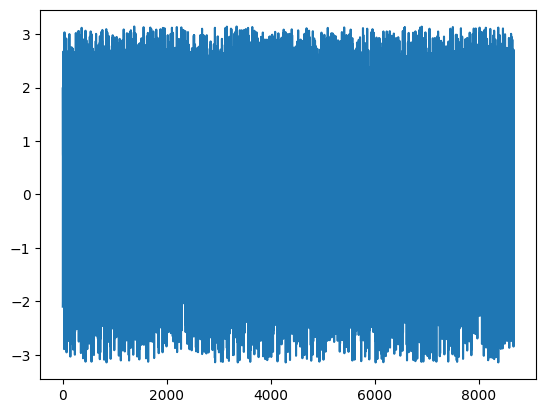

In [208]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


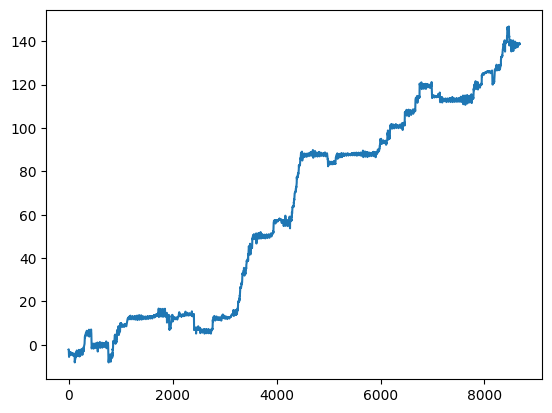

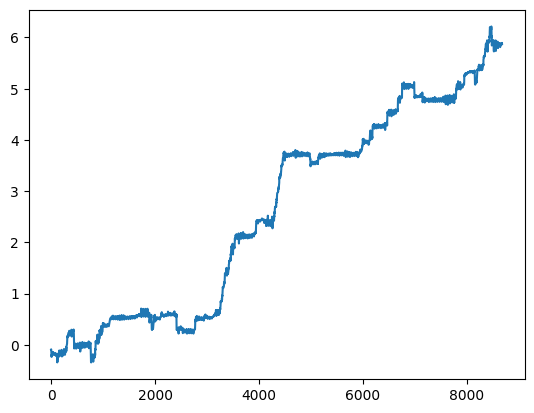

In [209]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

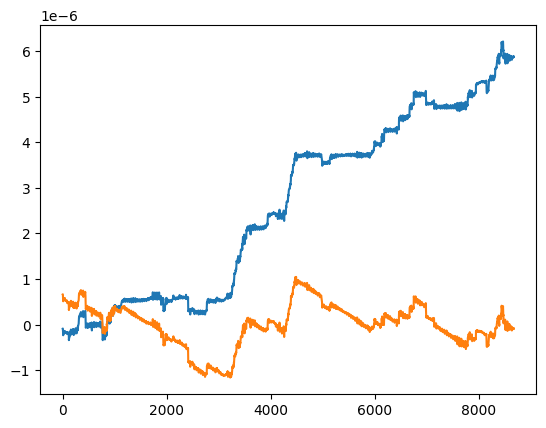

In [210]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 4000.0)

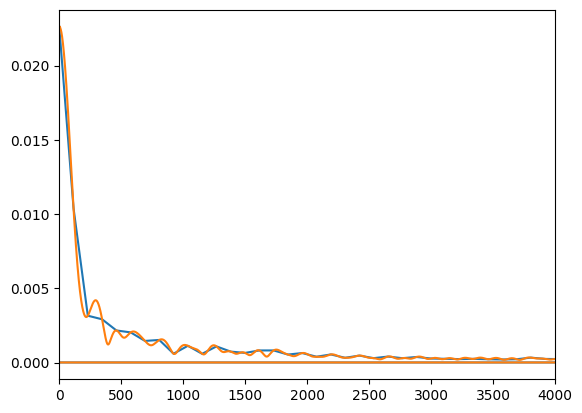

In [211]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 4000)

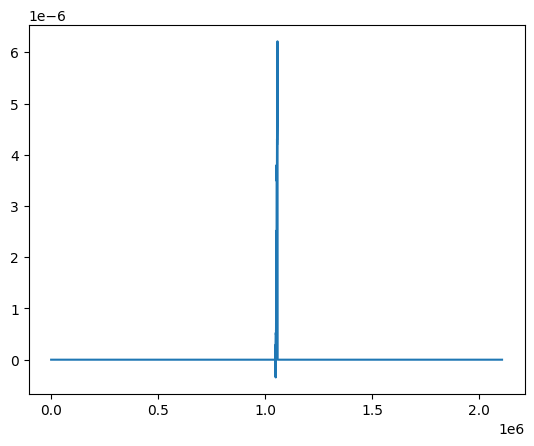

In [212]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)